<a href="https://colab.research.google.com/github/OneAndZero24/Autoencoder/blob/main/TestAutoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [3]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 5, 3),
            nn.ReLU(),
            nn.Conv2d(5, 25, 3),
            nn.ReLU(),
            nn.Conv2d(25, 250, 24),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(250, 25, 24),
            nn.ReLU(),
            nn.ConvTranspose2d(25, 5, 3),
            nn.ReLU(),
            nn.ConvTranspose2d(5, 1, 3),
            nn.Sigmoid(),
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

model = Autoencoder().to(device)

Using cuda device


In [6]:
#five images same for each epoch
def train(model, num_epochs=5, batch_size=64, learning_rate=1e-3):
    torch.manual_seed(42)
    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(),
                                 lr=learning_rate, 
                                 weight_decay=1e-5)
    train_loader = torch.utils.data.DataLoader(training_data, 
                                               batch_size=batch_size, 
                                               shuffle=True)
    outputs = []
    for epoch in range(num_epochs):
        for data in train_loader:
            img, _ = data
            img = img.to(device)
            recon = model(img)
            loss = criterion(recon, img)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        print('Epoch:{}, Loss:{:.4f}'.format(epoch+1, float(loss)))
        outputs.append((epoch, img, recon),)
    return outputs

In [7]:
max_epochs = 10
outputs = train(model, num_epochs=max_epochs)

Epoch:1, Loss:0.0103
Epoch:2, Loss:0.0075
Epoch:3, Loss:0.0077
Epoch:4, Loss:0.0058
Epoch:5, Loss:0.0060
Epoch:6, Loss:0.0054
Epoch:7, Loss:0.0062
Epoch:8, Loss:0.0056
Epoch:9, Loss:0.0051
Epoch:10, Loss:0.0039


Epoch: 1


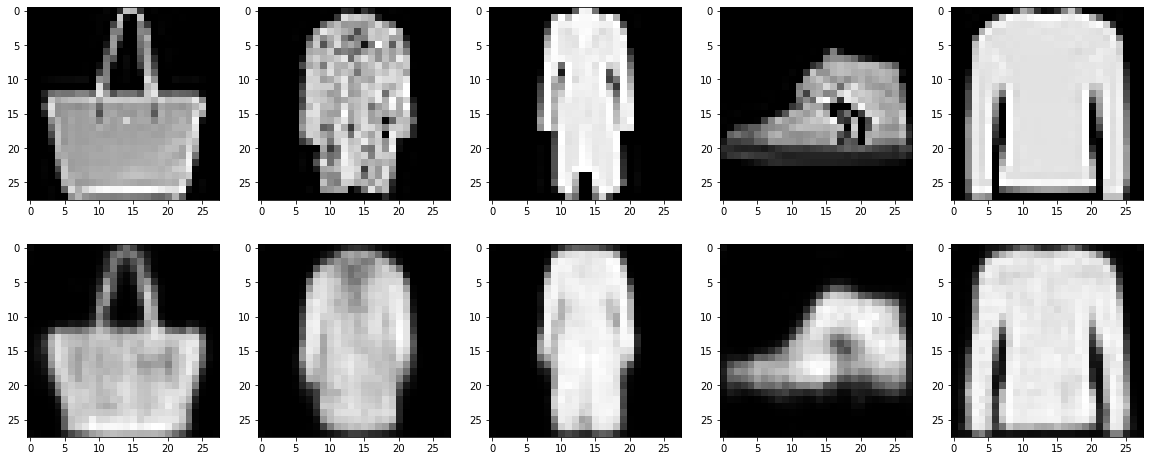

Epoch: 2


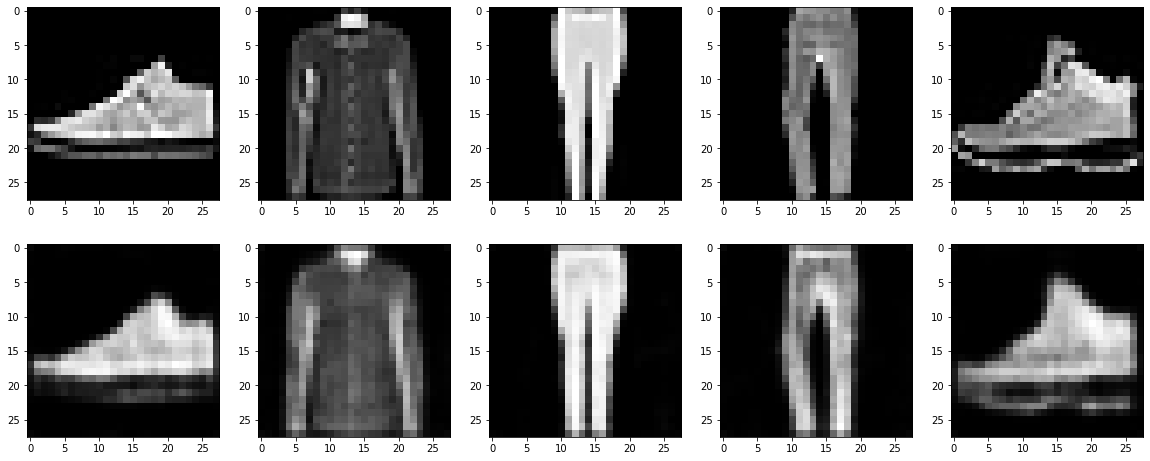

Epoch: 3


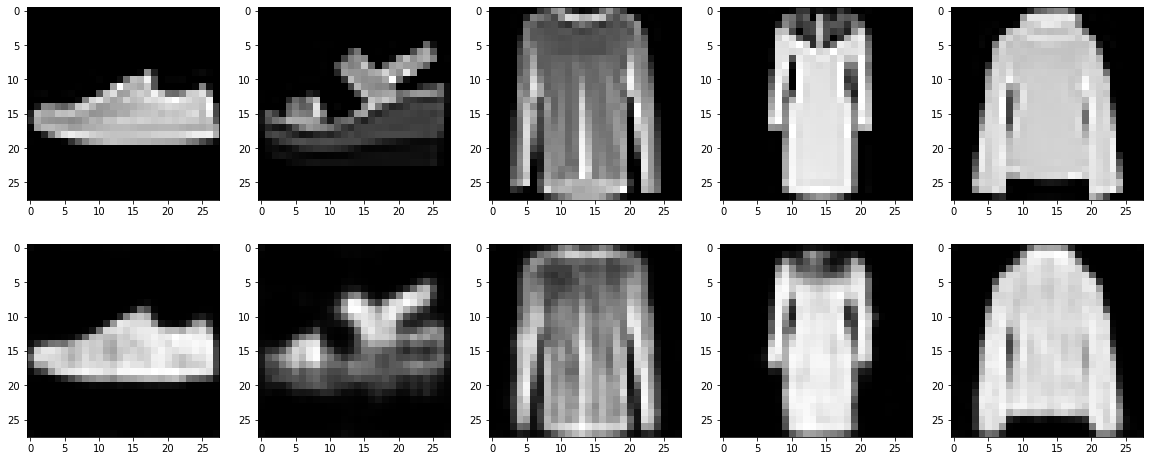

Epoch: 4


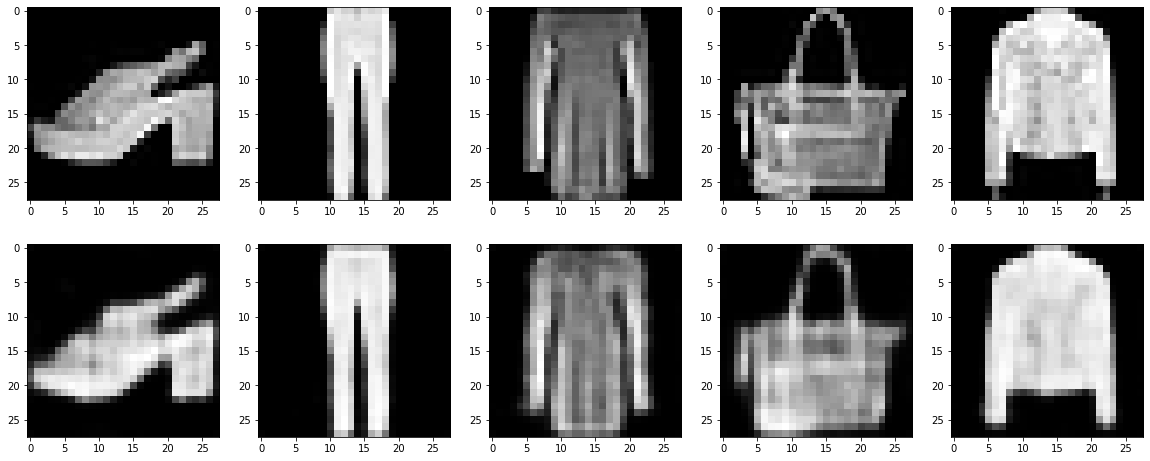

Epoch: 5


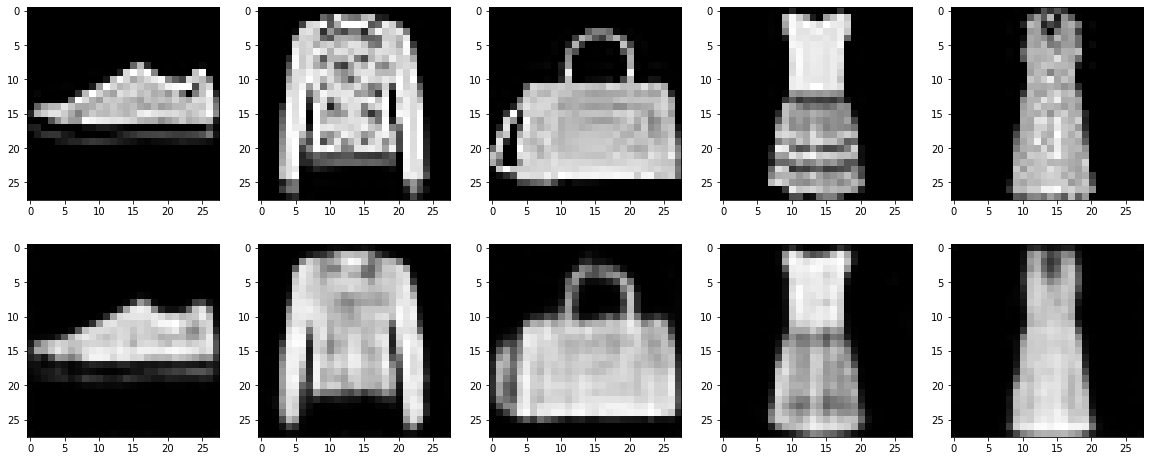

Epoch: 6


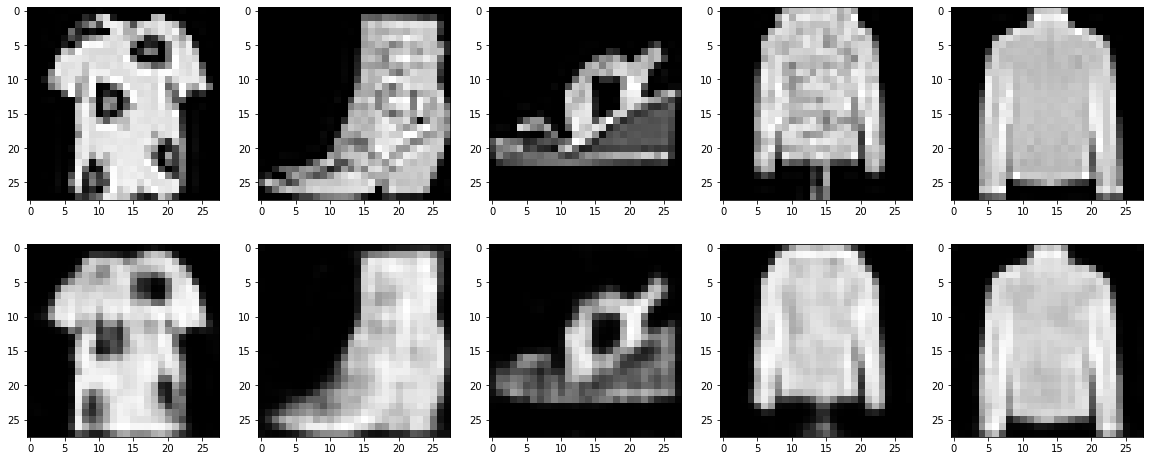

Epoch: 7


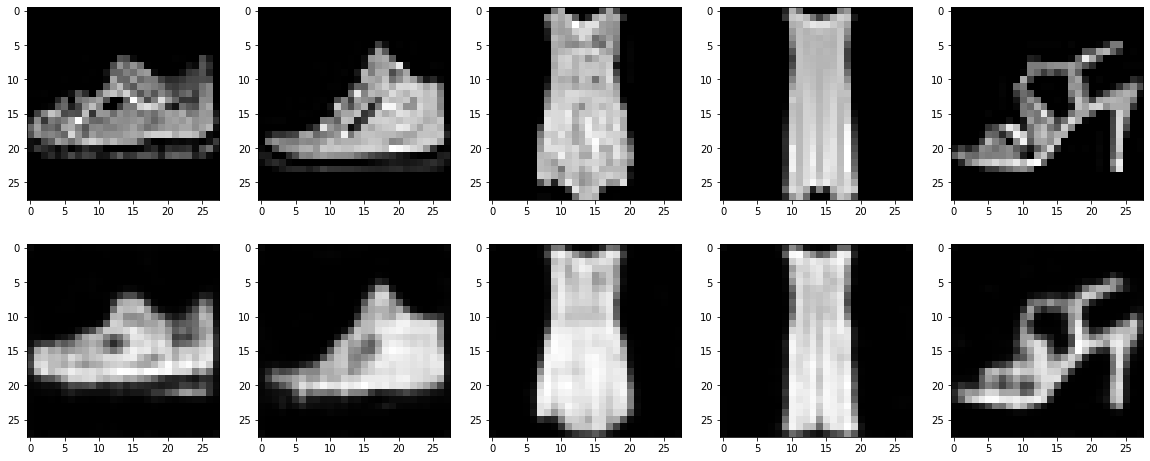

Epoch: 8


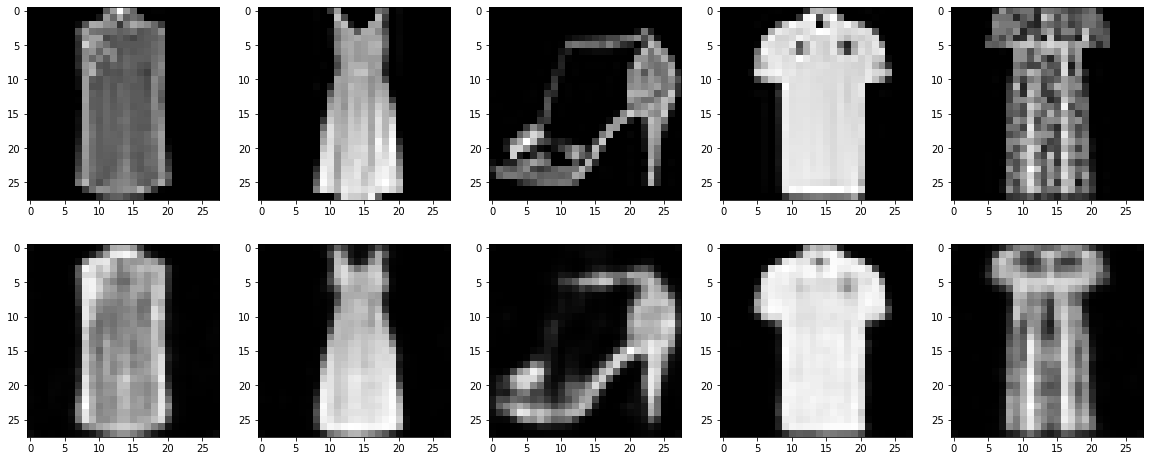

Epoch: 9


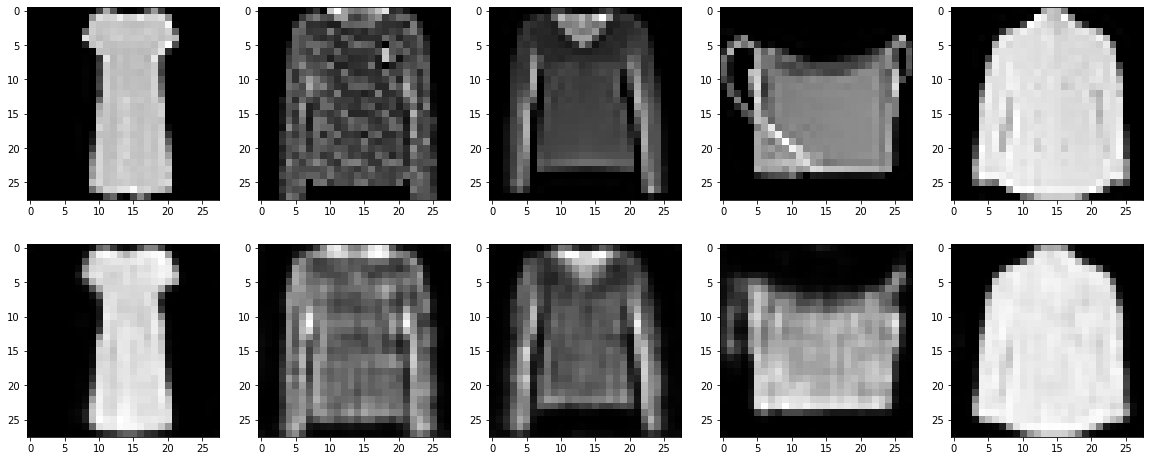

Epoch: 10


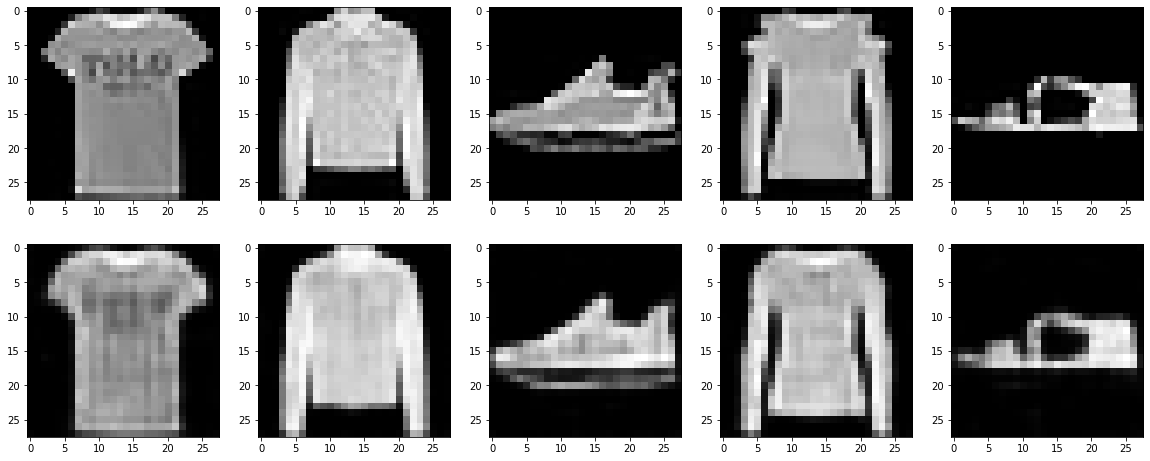

In [8]:
for e in range(0, max_epochs):
    fig = plt.figure(figsize=(20, 8))
    imgs = outputs[e][1].cpu().detach().numpy()
    recon = outputs[e][2].cpu().detach().numpy()
    print(f'Epoch: {e+1}')

    for i, item in enumerate(imgs):
        if i >= 5: break
        plt.subplot(2, 5, i+1)
        plt.imshow(item[0], cmap='gray')
    
    for i, item in enumerate(recon):
        if i >= 5: break
        plt.subplot(2, 5, 5+i+1)
        plt.imshow(item[0], cmap='gray')
    plt.show()